In [26]:
import csv
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [27]:
print(os.path.abspath('__file__'))

lines = []
with open('./data/driving_log.csv') as csvfile:  # 相对路径，用./
    csvsheet = csv.reader(csvfile)
    for line in csvsheet:
        lines.append(line)

lines = lines[1:-1]  # Remove the title line
print(lines[0]) # show the first effective data, the structure should be 
                # [center pic], [left pic], [right pic], [steering],[throttle],[brake],[speed]

D:\udacity_proj\CarND-Behavioral-Cloning-P3\__file__
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']


In [30]:
images = []
measurements = []
for line in lines:
    source_path = line[0]       # 看CSV，表里面第一项是地址
    #print(source_path)
    pic_name = source_path.split('/')[-1] #被‘/’分割后的最后一项
    #print(pic_name)
    current_path ='./data/IMG/'+pic_name
    image = cv2.imread(current_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# 因为cv2读取的是BGR因此要转换成RGB显示才正常,包括drive.py使用也是
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement) # get all the steering angle

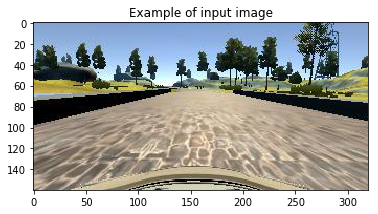

In [31]:
plt.imshow(images[1]) 
plt.show()
plt.title('Example of input image')

In [32]:
X_train = np.array(images)
Y_train = np.array(measurements)

## 数据准备完毕，开始构建网络

In [34]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

ModuleNotFoundError: No module named 'keras'